# Generative Machine-Learning models

Do you know about fake faces?

<img src="images/GM-progress.png" width="500pt"/>

Generate some here:

 https://www.thispersondoesnotexist.com/
 
Many other data generated by Machine-Learning models:

Faces | Manga | Gioconda
:-: | :-: | :-:
<img src="images/example_faces.gif" width="150pt"/> | <img src="images/example_manga.gif" width="150pt"/> | <img src="images/example_gioconda.gif" width="200pt"/>

<img src="images/example_srim.jpg" width="750pt"/>
<img src="images/example_pix2pix.jpg" width="750pt"/>
<img src="images/example_zebra.gif" width="750pt"/>
<img src="images/example_dance.gif" width="750pt"/>


- images for various targets from scratch or condition;
- videos from text or images;
- music for different instruments/genres;
- voice from text or from scratch;
- text from scratch, from other text (like translation);
- HTML pages, JavaScript code;
- ...

Try plaing with:

http://nvidia-research-mingyuliu.com/gaugan  
http://jiahuiyu.com/deepfill/  
https://affinelayer.com/pixsrv/  

## Discriminative VS generative models

Let's consider a __classification task__:

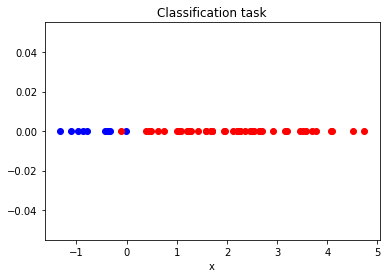

In [38]:
from matplotlib import pyplot as plt
import numpy as np
from numpy.random import normal as randn

# Unbalanced classification problem:
x1 = randn(size=(10,))/2 - 1
x2 = randn(size=(50,)) + 2
plt.scatter(x1,np.zeros(x1.shape),c='b')
plt.scatter(x2,np.zeros(x2.shape),c='r')
plt.title('Classification task')
plt.xlabel('x')
plt.show();

In the probabilistic framework, this problem can be faced at least in 2 ways:

- discriminative: given the data find the __labels probability__;
- generative: given a label __how much likely__ are the data?

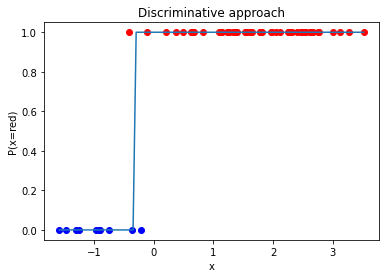

In [36]:
from sklearn.linear_model import LogisticRegression

# Discriminative model:
samples = np.concatenate([x1,x2]).reshape(-1,1)
classification = np.concatenate([np.zeros(x1.shape), np.ones(x2.shape)])
model = LogisticRegression().fit(samples,classification)

plt.scatter(x1,np.zeros(x1.shape),c='b')
plt.scatter(x2,np.ones(x2.shape),c='r')
x = np.linspace(min(samples),max(samples),100)
plt.plot(x,model.predict(x))
plt.title('Discriminative approach')
plt.xlabel('x')
plt.ylabel('P(x=red)')
plt.show()

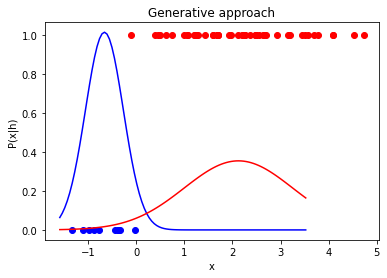

In [40]:
from scipy.stats import norm

# Generative model:
mu1 = x1.mean()
sigma1 = x1.std()
mu2 = x2.mean()
sigma2 = x2.std()

plt.scatter(x1,np.zeros(x1.shape),c='b')
plt.plot(x,norm.pdf(x,mu1,sigma1),c='b')
plt.scatter(x2,np.ones(x2.shape),c='r')
plt.plot(x,norm.pdf(x,mu2,sigma2),c='r')
plt.title('Generative approach')
plt.xlabel('x')
plt.ylabel('P(x|h)')
plt.show()

## Latent variables

Assume the labels $h$ describe the structure of data:
    
> __consider $h$ as unobservable random variables (hidden causes) inducing observable outcomes $x$__

_Problem: infer of the hidden variables $h$ given the outcome $x$._

By chain rule the following are equivalent:

$$\large
p(x,h) = p(h|x)p(x) = p(x|h)p(h)
$$

This means that the two possibiliites are:

- given $x$ estimate $h$ directly with: $\large p(h|x)$ (discriminative);
- for every $h$ compute $\large p(x|h)p(h)$ and choose the maximizing one.

In the second case, if the prior $p(h)$ is uninformative, we can maximize the likelihood of data $\large p(x|h)$.

## Graphical model representation

The two expressions can be represented as graphical models as follows:

<IPython.core.display.Latex object>

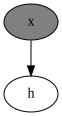

<IPython.core.display.Latex object>

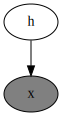

In [1]:
from visualization import graph

base = "x[style=filled,fillcolor=gray]\n"
graph(
    f"{base}x->h", 
    title="Discriminative modeling: $\large arg\max_hp(x,h) = arg\max_hp(h|x)p(x)$")
graph(
    f"{base}h->x", 
    title="Generative modeling: $\large arg\max_hp(x,h) = arg\max_hp(x|h)p(h)$")

## Example: direct $p(h|x)$ estimation (discriminative)

Naive Bayes: $\large p(h|x)=\prod_i{p(h_i|x)}$

We can estimate the (simpler) $p(h_i|x)$ (eg. in tabular form if discrete).

Given an $x$, choose the combination of $h_i$ maximizing $p(h|x)$.

__This approach allows discrimination only__

## Example: maximum likelihood $p(x|h)$ (generative)

PPCA: $\large x = Wh + \mu + \sigma$  
where $\sigma \sim \mathcal{N}$

A stochastic recipe to compute $x$ given $h$ is defined by the model.

__This approach allows both discrimination and generation__.

## Example: PCA on faces

In [50]:
import numpy as np
import pandas as pd

# Load data (from https://github.com/daradecic/Python-Eigenfaces):
faces = pd.read_csv('data/face_data.csv.gz')
faces = faces.drop('target',axis=1)
faces = np.array(faces)

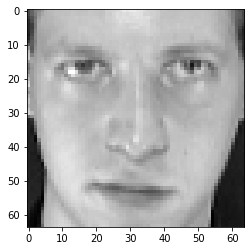

In [53]:
from matplotlib import pyplot as plt

def plot_face(face):
    plt.figure()
    plt.imshow(face.reshape(64, 64), cmap='gray')
    plt.show()

plot_face(faces[0])

In [55]:
from sklearn.decomposition import PCA

# Computing the PCA of images:
pca = PCA(n_components=100).fit(faces)
latent = pca.transform(faces)

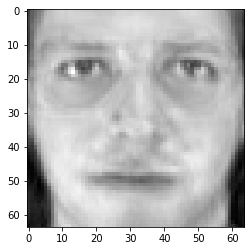

In [56]:
# Reconstructing a face:
def reconstruct_face(latent):
    return pca.inverse_transform(latent)

def plot_reconstructed_face(latent):
    plot_face(reconstruct_face(latent))

plot_reconstructed_face(latent[0])

In [58]:
from visualization import interact_vector

# Synthesis of new faces:
def plot_new_face(v):
    # Mean and modified face:
    n = latent.shape[1]
    h = np.zeros((n,))
    f_mean = reconstruct_face(h)
    h[0:len(v)] = v
    f_mod = reconstruct_face(h)
    
    # Plotting both:
    _, axes = plt.subplots(1, 2, figsize=(8, 16))
    fs = [f_mean,f_mod]
    for i in range(2):
        axes[i].imshow(fs[i].reshape(64, 64), cmap='gray')
    plt.show()
    print("h:",h)

# Interactive face reconstruction:
interact_vector("h", 5, plot_new_face, min=-10, max=10, step=1);

interactive(children=(FloatSlider(value=0.0, description='h0', max=10.0, min=-10.0, step=1.0), FloatSlider(val…